In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv('dataset.csv')

X = data.drop('Outcome', axis=1)
Y = data['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

model = GradientBoostingClassifier()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

f1 = f1_score(Y_test, Y_pred)
print(f'F1 Score: {f1}')

cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(cm)

conf_matrix = confusion_matrix(Y_test, Y_pred)

tn, fp, fn, tp = conf_matrix.ravel()

print(f'True Negatives (Predicted Not dia, Actual Not dia): {tn}')
print(f'False Positives (Predicted dia, Actual Not dia): {fp}')
print(f'False Negatives (Predicted Not dia, Actual dia): {fn}')
print(f'True Positives (Predicted dia, Actual dia): {tp}')



Accuracy: 0.9585987261146497
F1 Score: 0.9371980676328503
Confusion Matrix:
[[204   4]
 [  9  97]]
True Negatives (Predicted Not dia, Actual Not dia): 204
False Positives (Predicted dia, Actual Not dia): 4
False Negatives (Predicted Not dia, Actual dia): 9
True Positives (Predicted dia, Actual dia): 97


In [ ]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd




models = {
    'Support Vector Machine': svm.SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'logi':LogisticRegression(max_iter=1000)
}
from sklearn.metrics import precision_score, recall_score, confusion_matrix


for model_name, model in models.items():
    print(f'\n{model_name}:')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}')
    recall = recall_score(Y_test, Y_pred)
    print(f'Recall: {recall}')
    precision = precision_score(Y_test, Y_pred)
    print(f'Precision: {precision}')


Support Vector Machine:
Accuracy: 0.7738853503184714
F1 Score: 0.5942857142857143
Confusion Matrix:
[[191  17]
 [ 54  52]]
Recall: 0.49056603773584906
Precision: 0.7536231884057971

Gradient Boosting:
Accuracy: 0.9585987261146497
F1 Score: 0.9371980676328503
Confusion Matrix:
[[204   4]
 [  9  97]]
Recall: 0.9150943396226415
Precision: 0.9603960396039604

K-Nearest Neighbor:
Accuracy: 0.8280254777070064
F1 Score: 0.7157894736842104
Confusion Matrix:
[[192  16]
 [ 38  68]]
Recall: 0.6415094339622641
Precision: 0.8095238095238095

Naive Bayes:
Accuracy: 0.7484076433121019
F1 Score: 0.5989847715736041
Confusion Matrix:
[[176  32]
 [ 47  59]]
Recall: 0.5566037735849056
Precision: 0.6483516483516484

logi:
Accuracy: 0.7866242038216561
F1 Score: 0.6171428571428571
Confusion Matrix:
[[193  15]
 [ 52  54]]
Recall: 0.5094339622641509
Precision: 0.782608695652174


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1039,8,124,76,24,600,28.7,0.687,52,1
1040,0,165,90,33,680,52.3,0.427,23,0
1041,0,165,90,33,680,52.3,0.427,23,0
1042,4,197,70,39,744,36.7,2.329,31,0
1043,4,197,70,39,744,36.7,2.329,31,0


In [ ]:
zero_counts = (data == 0).sum()
zero_counts

Pregnancies                 162
Glucose                       2
BloodPressure                 2
SkinThickness                 2
Insulin                       0
BMI                           3
DiabetesPedigreeFunction      0
Age                           0
Outcome                     707
dtype: int64

In [ ]:
feature_names = X.columns

coefficients = model.coef_[0]

feature_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_coefficients = feature_coefficients.reindex(feature_coefficients['Coefficient'].abs().sort_values(ascending=False).index)

print(feature_coefficients)

                    Feature  Coefficient
6  DiabetesPedigreeFunction     1.173832
0               Pregnancies     0.099477
5                       BMI     0.085640
1                   Glucose     0.034417
7                       Age     0.016596
2             BloodPressure    -0.008792
3             SkinThickness    -0.003115
4                   Insulin    -0.001235


In [ ]:
outcome_counts = data['Outcome'].value_counts()

print("Count of 0s:", outcome_counts[0])
print("Count of 1s:", outcome_counts[1])

Count of 0s: 707
Count of 1s: 337


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1039,8,124,76,24,600,28.7,0.687,52,1
1040,0,165,90,33,680,52.3,0.427,23,0
1041,0,165,90,33,680,52.3,0.427,23,0
1042,4,197,70,39,744,36.7,2.329,31,0
1043,4,197,70,39,744,36.7,2.329,31,0


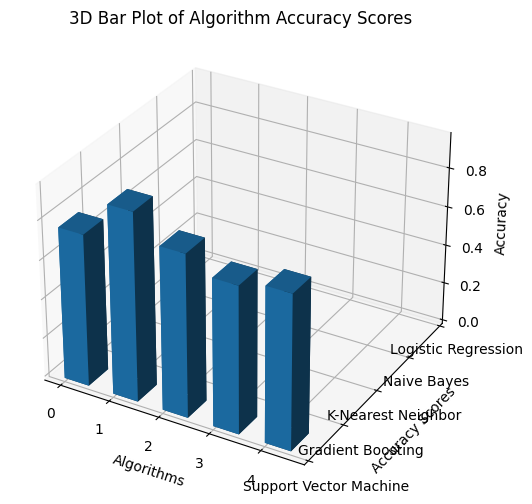

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


algorithm_names = ['Support Vector Machine', 'Gradient Boosting', 'K-Nearest Neighbor', 'Naive Bayes', 'Logistic Regression']
accuracy_scores = [0.7738853503184714, 0.9585987261146497, 0.8280254777070064, 0.7484076433121019, 0.7866242038216561]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

y_pos = range(len(algorithm_names))
z_pos = [0] * len(algorithm_names)
width = depth = 0.5

ax.bar3d(y_pos, z_pos, np.zeros_like(y_pos), width, depth, accuracy_scores, shade=True)

ax.set_yticks(y_pos)
ax.set_yticklabels(algorithm_names)
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy Scores')
ax.set_zlabel('Accuracy')

ax.set_title('3D Bar Plot of Algorithm Accuracy Scores')

plt.show()


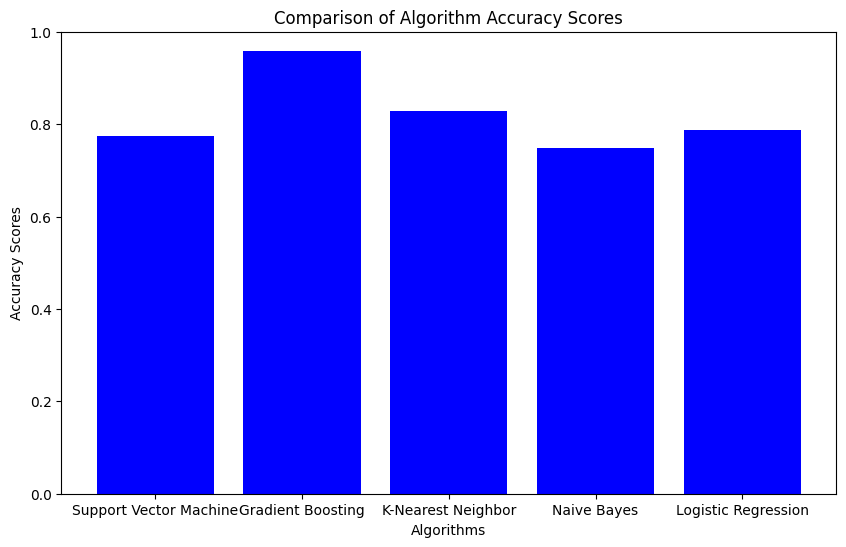

In [ ]:
import matplotlib.pyplot as plt

algorithm_names = ['Support Vector Machine', 'Gradient Boosting', 'K-Nearest Neighbor', 'Naive Bayes', 'Logistic Regression']
accuracy_scores = [0.7738853503184714, 0.9585987261146497, 0.8280254777070064, 0.7484076433121019, 0.7866242038216561]

plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_scores, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Comparison of Algorithm Accuracy Scores')
plt.ylim(0.00, 1.00)
plt.show()
